# Comparative Analysis of Machine Learning Algorithms on Student Admission Classification Dataset.
#### Here, Different Machine Learning Alrgorithms are used such as:

>Logistic Regression,
>Decision Tree,
>KNN, and 
>Support Vector Machine

###### The aim of this project is to identify efficient Algorithm (which can perform best ) in this classification. It is to classify the student as Admit or Reject based on their Language Test Score, University Rating, Strength of their motivation letter (rated from 1-5), strength of their recommendation letter (rated from 1-5), CGPA and Research Experience. 

In [296]:
#Importing basic packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
##import matplotlib.pyplot as plt 
##%matplotlib inline
##import seaborn as sns
##sns.set(style='white', color_codes=True)

#Importing sklearn modules
from sklearn.metrics import mean_squared_error,confusion_matrix, precision_score, recall_score, auc,roc_curve
from sklearn import linear_model, neighbors, svm, tree
from sklearn.linear_model import Ridge

from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn import svm,model_selection, tree, linear_model, neighbors
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

import warnings

# Suppress specific FutureWarning from SciPy
warnings.filterwarnings("ignore", message=".*the default behavior of `mode` typically preserves the axis it acts along.*")

seed = 5


In [297]:
#Loading the data and checking for missing values
dataset=pd.read_csv('StudentData1.csv')
dataset.isnull().sum()

TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Admission            0
dtype: int64

####  Define features and target variable

In [299]:
X = df.drop(columns='Admission')
y = df['Admission']

#### Split the data into training and testing sets

In [300]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

#### Standardize the features

In [301]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Storing machine learning algorithms (MLA) in a variable

The MLAs we have taken up for comparison are Logistic Regression, K-nearest neighbour classifier, Decision tree classifier, and Support Vector Machine.

In [269]:
# Application of all Machine Learning methods
models = []
models.append(('LR', LogisticRegression()))
models.append(('KNN', KNeighborsClassifier()))
models.append(('DTree', DecisionTreeClassifier()))
models.append(('SVM', SVC()))

## Creating a box plot to compare there accuracy

This part of code creates a box plot for all the models against their cross validation score.

LR: 0.815625 (0.042962)
KNN: 0.784375 (0.047290)
DTree: 0.731250 (0.054486)
SVM: 0.803125 (0.031406)


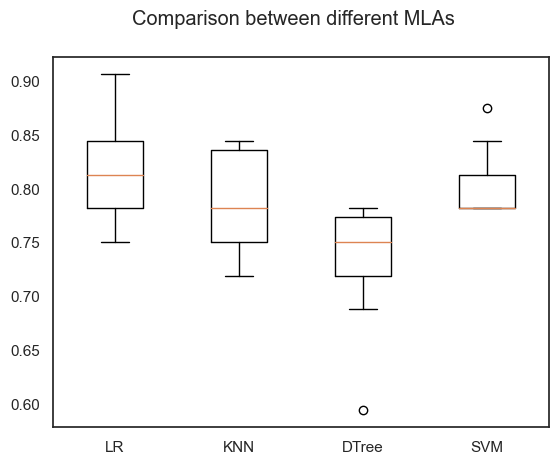

In [289]:
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'
for name, model in models:
    kfold = model_selection.KFold(n_splits=10, random_state=seed, shuffle=True)
    cv_results = model_selection.cross_val_score(model, X_train_scaled, y_train, cv=kfold, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

# Boxplot algorithm comparison
fig = plt.figure()
fig.suptitle('Comparison between different MLAs')
ax = fig.add_subplot(111)
plt.boxplot(results)
ax.set_xticklabels(names)
plt.show()

In [282]:
# Application of all Machine Learning methods
MLA = [
    #GLM
    linear_model.LogisticRegressionCV(),
    
    #SVM
    SVC(probability=True),
    
    #Trees    
    tree.DecisionTreeClassifier(),
    
    #Nearest Neighbor
    neighbors.KNeighborsClassifier(),
    ]

In [283]:
MLA_columns = []
MLA_compare = pd.DataFrame(columns=MLA_columns)

row_index = 0
for alg in MLA:
    predicted = alg.fit(X_train_scaled, y_train).predict(X_test_scaled)
    fp, tp, th = roc_curve(y_test, predicted)
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'Algorithm'] = MLA_name  # More descriptive name

    # Ensure 'Test Accuracy' column is created before sorting
    MLA_compare.loc[row_index, 'Test Set Accuracy'] = round(alg.score(X_test_scaled, y_test), 4)

    MLA_compare.loc[row_index, 'Precision'] = precision_score(y_test, predicted)
    MLA_compare.loc[row_index, 'Recall'] = recall_score(y_test, predicted)

    row_index += 1

# Now sort by 'Test Set Accuracy' (descriptive name)
MLA_compare.sort_values(by=['Test Set Accuracy'], ascending=False, inplace=True)
MLA_compare


,Algorithm,Test Set Accuracy,Precision,Recall
0,LogisticRegressionCV,0.8875,0.882353,0.937500
1,SVC,0.8625,0.862745,0.916667
3,KNeighborsClassifier,0.8375,0.857143,0.875000
2,DecisionTreeClassifier,0.8000,0.807692,0.875000


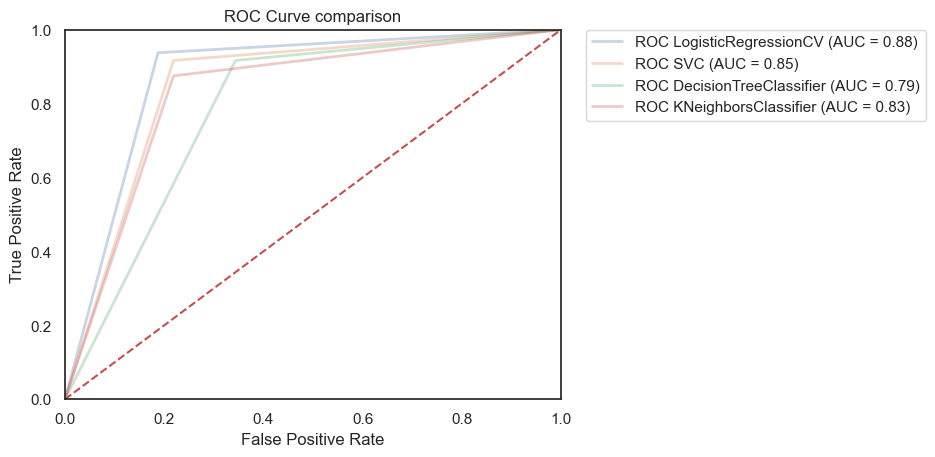

In [288]:
# Creating plot to show the ROC for all MLA
index = 1
for alg in MLA:
    
    
    predicted = alg.fit(X_train_scaled, y_train).predict(X_test_scaled)
    fp, tp, th = roc_curve(y_test, predicted)
    roc_auc_mla = auc(fp, tp)
    MLA_name = alg.__class__.__name__
    plt.plot(fp, tp, lw=2, alpha=0.3, label='ROC %s (AUC = %0.2f)'  % (MLA_name, roc_auc_mla))
   
    index+=1

plt.title('ROC Curve comparison')
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
plt.plot([0,1],[0,1],'r--')
plt.xlim([0,1])
plt.ylim([0,1])
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')    
plt.show()